# Importing Libraries

In [1]:
import pandas as pd #for dataframe
import os #To Interact with local system directories
import numpy as np # linear algebra
import matplotlib.pyplot as plt # for visualizations
import seaborn as sns # for visualizations
from scipy import stats #import chi2_contigency #  for Chi square Test
from scipy.stats import chi2_contingency
#from sklearn.ensemble import RandomForestClassifier # for random forest
from fancyimpute import KNN #for missing value analysis
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor # for decission tree
from sklearn.ensemble import RandomForestRegressor # for random forest
import sklearn.feature_selection as fs # feature selection library in scikit-learn
import statsmodels.api as sm # for linear regression
# from sklearn import cross_validation
%matplotlib inline

# Setting working Directory

In [2]:
os.getcwd()
os.chdir("C:\Python")
os.getcwd()

'C:\\Python'

# Loading the dataset

In [3]:
df_day = pd.read_csv('day.csv')

# Explortory Data Analysis

In [4]:
df_day.shape

(731, 16)

In [5]:
df_day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [6]:
df_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
instant       731 non-null int64
dteday        731 non-null object
season        731 non-null int64
yr            731 non-null int64
mnth          731 non-null int64
holiday       731 non-null int64
weekday       731 non-null int64
workingday    731 non-null int64
weathersit    731 non-null int64
temp          731 non-null float64
atemp         731 non-null float64
hum           731 non-null float64
windspeed     731 non-null float64
casual        731 non-null int64
registered    731 non-null int64
cnt           731 non-null int64
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [7]:
df_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [8]:
# Dropping the 1st column i.e. 'instant' & 'dteday' because these are statisticaly insignificant
df_day=df_day.drop(['instant','dteday'],axis=1)

In [9]:
df_day.shape

(731, 14)

In [10]:
df_day.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


#### Assigning appropriate types to variables

In [11]:
cat_var=['season','yr','mnth','holiday','weekday','workingday','weathersit']
df_day[cat_var]=df_day[cat_var].apply(lambda x: x.astype('category') )

In [12]:
df_day.describe()

,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [13]:
df_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 14 columns):
season        731 non-null category
yr            731 non-null category
mnth          731 non-null category
holiday       731 non-null category
weekday       731 non-null category
workingday    731 non-null category
weathersit    731 non-null category
temp          731 non-null float64
atemp         731 non-null float64
hum           731 non-null float64
windspeed     731 non-null float64
casual        731 non-null int64
registered    731 non-null int64
cnt           731 non-null int64
dtypes: category(7), float64(4), int64(3)
memory usage: 46.4 KB


## Univariate Analysis

#### 1. Target Variable Analysis

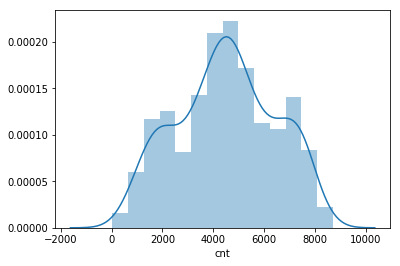

In [14]:
#plotting target variable
sns.distplot(df_day['cnt']);

In [15]:
print("Skewness: %f" % df_day['cnt'].skew())
print("Kurtosis: %f" % df_day['cnt'].kurt())

Skewness: -0.047353
Kurtosis: -0.811922


#### 2. Independent Variables Analysis

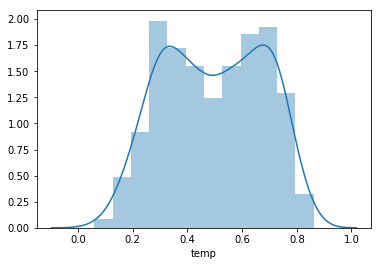

In [16]:
sns.distplot(df_day['temp']);

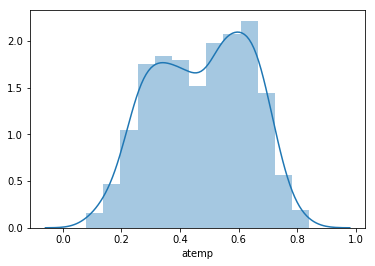

In [17]:
sns.distplot(df_day['atemp']);

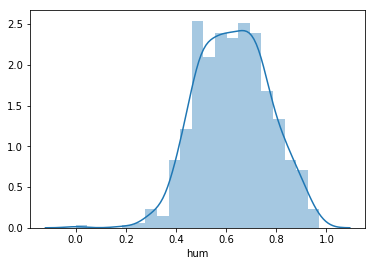

In [18]:
sns.distplot(df_day['hum']);

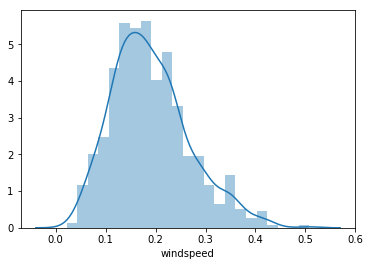

In [19]:
sns.distplot(df_day['windspeed']);

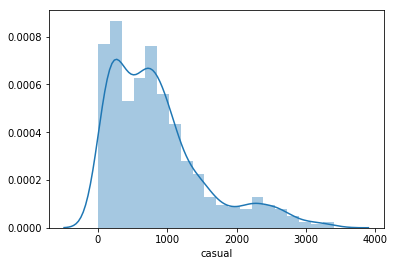

In [20]:
sns.distplot(df_day['casual']);

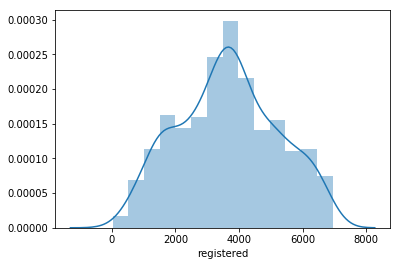

In [21]:
sns.distplot(df_day['registered']);

## Bivariate Analysis

#### Relation between Numerical Variable 'temp' and target variable 'cnt'

In [22]:
df_day['temp'].value_counts()

0.265833    5
0.635000    5
0.437500    4
0.564167    4
0.649167    4
0.484167    4
0.680000    4
0.696667    4
0.710833    4
0.514167    3
0.282500    3
0.667500    3
0.459167    3
0.554167    3
0.733333    3
0.636667    3
0.606667    3
0.342500    3
0.731667    3
0.653333    3
0.393333    3
0.530000    3
0.343333    3
0.414167    3
0.353333    3
0.577500    3
0.775000    3
0.715833    3
0.274167    3
0.550000    3
           ..
0.834167    1
0.381667    1
0.346667    1
0.765833    1
0.640833    1
0.415833    1
0.545000    1
0.359167    1
0.365833    1
0.623333    1
0.160870    1
0.365217    1
0.712500    1
0.348696    1
0.096522    1
0.538333    1
0.361667    1
0.715000    1
0.711667    1
0.343478    1
0.335833    1
0.570000    1
0.282609    1
0.396667    1
0.404167    1
0.226957    1
0.354167    1
0.580833    1
0.231667    1
0.337500    1
Name: temp, Length: 499, dtype: int64

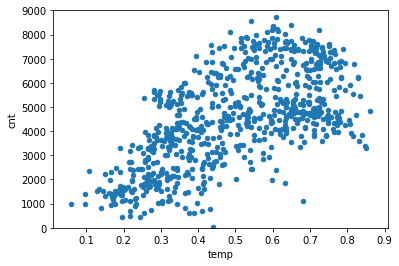

In [23]:
#Now drawing scatter plot between 'temp' and 'cnt' variables

var = 'temp'
data = pd.concat([df_day['cnt'], df_day[var]], axis=1)
data.plot.scatter(x=var, y='cnt', ylim=(0,9000));

It is showing  there is good relation between 'temp' and 'cnt'

#### Relation between Numerical Variable 'atemp' and target variable 'cnt'

In [24]:
df_day['atemp'].value_counts()

0.654688    4
0.637008    3
0.375621    3
0.542929    2
0.603554    2
0.537896    2
0.243058    2
0.351629    2
0.594704    2
0.450121    2
0.387608    2
0.242400    2
0.298422    2
0.724121    2
0.611121    2
0.595346    2
0.378779    2
0.594083    2
0.398350    2
0.425492    2
0.574500    2
0.607962    2
0.522721    2
0.318812    2
0.654042    2
0.466525    2
0.325750    2
0.703292    2
0.607975    2
0.654054    2
           ..
0.326379    1
0.565217    1
0.228587    1
0.497463    1
0.338383    1
0.255679    1
0.542925    1
0.513242    1
0.533450    1
0.565067    1
0.445062    1
0.647100    1
0.513848    1
0.355425    1
0.645846    1
0.412237    1
0.116175    1
0.274621    1
0.707071    1
0.188413    1
0.323867    1
0.456429    1
0.150888    1
0.761367    1
0.461483    1
0.612379    1
0.464021    1
0.624371    1
0.512621    1
0.538521    1
Name: atemp, Length: 690, dtype: int64

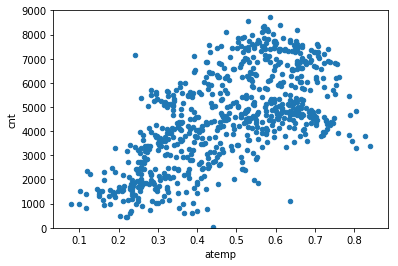

In [25]:
#Now drawing scatter plot between 'atemp' and 'cnt' variables

var = 'atemp'
data = pd.concat([df_day['cnt'], df_day[var]], axis=1)
data.plot.scatter(x=var, y='cnt', ylim=(0,9000));

It is showing  there is good relation between 'atemp' and 'cnt'

#### Relation between Numerical Variable 'hum' and target variable 'cnt'

In [26]:
df_day['hum'].value_counts()

0.613333    4
0.568333    3
0.542500    3
0.752917    3
0.697083    3
0.630833    3
0.605000    3
0.590000    3
0.690000    3
0.729583    3
0.741250    3
0.552083    3
0.590417    3
0.483333    3
0.722917    3
0.538333    3
0.570000    3
0.862500    2
0.757500    2
0.434167    2
0.441250    2
0.672917    2
0.537917    2
0.410000    2
0.677500    2
0.805833    2
0.734583    2
0.668750    2
0.540833    2
0.694167    2
           ..
0.642500    1
0.422500    1
0.494167    1
0.616957    1
0.700833    1
0.640417    1
0.187917    1
0.414583    1
0.559167    1
0.691250    1
0.581667    1
0.561667    1
0.720417    1
0.896667    1
0.838750    1
0.797083    1
0.426250    1
0.457500    1
0.618333    1
0.609167    1
0.812917    1
0.810833    1
0.537500    1
0.712500    1
0.704167    1
0.615000    1
0.686667    1
0.480833    1
0.649565    1
0.741739    1
Name: hum, Length: 595, dtype: int64

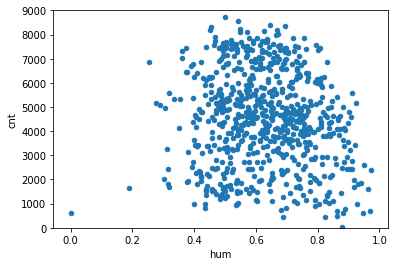

In [27]:
#Now drawing scatter plot between 'hum' and 'cnt' variables

var = 'hum'
data = pd.concat([df_day['cnt'], df_day[var]], axis=1)
data.plot.scatter(x=var, y='cnt', ylim=(0,9000));

It is showing  there is average relation between 'hum' and 'cnt'

#### Relation between Numerical Variable 'windspeed' and target variable 'cnt'

In [28]:
df_day['windspeed'].value_counts()

0.228858    3
0.118792    3
0.134954    3
0.149883    3
0.166667    3
0.110700    3
0.136817    3
0.167912    3
0.106350    3
0.116908    2
0.342667    2
0.157350    2
0.144904    2
0.121896    2
0.146775    2
0.102000    2
0.130600    2
0.296037    2
0.215792    2
0.361950    2
0.131221    2
0.122512    2
0.266175    2
0.140550    2
0.118167    2
0.063450    2
0.133721    2
0.168726    2
0.230725    2
0.236937    2
           ..
0.293961    1
0.117562    1
0.139308    1
0.077125    1
0.064071    1
0.147392    1
0.132467    1
0.162938    1
0.207721    1
0.271158    1
0.115522    1
0.225754    1
0.200875    1
0.237567    1
0.197763    1
0.213009    1
0.169779    1
0.136926    1
0.215804    1
0.103863    1
0.284829    1
0.193417    1
0.292287    1
0.093921    1
0.125621    1
0.388067    1
0.185333    1
0.189667    1
0.290421    1
0.415429    1
Name: windspeed, Length: 650, dtype: int64

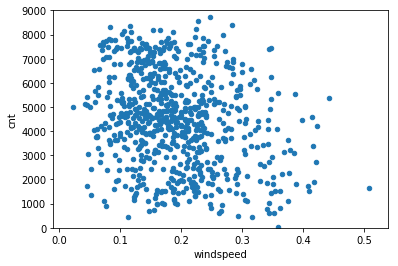

In [29]:
#Now drawing scatter plot between 'windspeed' and 'cnt' variables

var = 'windspeed'
data = pd.concat([df_day['cnt'], df_day[var]], axis=1)
data.plot.scatter(x=var, y='cnt', ylim=(0,9000));

It is showing  there is nagative relation between 'windspeed' and 'cnt'

#### Relation between Numerical Variable 'casual' and target variable 'cnt'

In [30]:
df_day['casual'].value_counts()

968     4
120     4
244     3
653     3
639     3
123     3
140     3
163     3
775     3
692     2
174     2
178     2
699     2
695     2
694     2
1026    2
190     2
1077    2
678     2
676     2
195     2
673     2
667     2
665     2
729     2
745     2
155     2
2795    2
349     2
819     2
       ..
559     1
560     1
562     1
563     1
2613    1
568     1
569     1
571     1
2622    1
579     1
2634    1
1612    1
845     1
1619    1
1278    1
1557    1
599     1
601     1
603     1
606     1
2708    1
1633    1
611     1
1088    1
613     1
614     1
1639    1
616     1
620     1
1118    1
Name: casual, Length: 606, dtype: int64

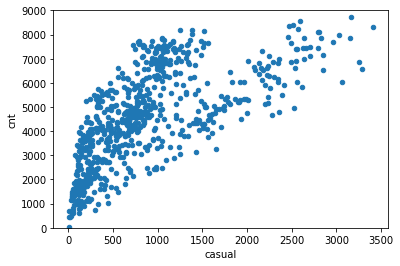

In [31]:
#Now drawing scatter plot between 'casual' and 'cnt' variables

var = 'casual'
data = pd.concat([df_day['cnt'], df_day[var]], axis=1)
data.plot.scatter(x=var, y='cnt', ylim=(0,9000));

It is showing  there is somewhat good relation between 'casual' and 'cnt'

#### Relation between Numerical Variable 'registered' and target variable 'cnt'

In [32]:
df_day['registered'].value_counts()

4841    3
1707    3
6248    3
3578    2
4429    2
1730    2
3848    2
2115    2
3840    2
674     2
1368    2
1454    2
3854    2
2713    2
4446    2
5711    2
3425    2
3614    2
4934    2
3594    2
3896    2
1628    2
4224    2
3248    2
4232    2
3946    2
2419    2
5219    2
4240    2
5265    2
       ..
2697    1
1672    1
6790    1
3717    1
4739    1
3714    1
2688    1
3185    1
1432    1
6803    1
5780    1
1687    1
6911    1
4790    1
1714    1
4750    1
2733    1
1708    1
1705    1
6433    1
5124    1
1689    1
1700    1
1699    1
1697    1
2720    1
670     1
1693    1
4763    1
4097    1
Name: registered, Length: 679, dtype: int64

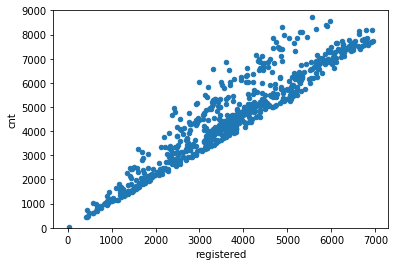

In [33]:
#Now drawing scatter plot between 'registered' and 'cnt' variables

var = 'registered'
data = pd.concat([df_day['cnt'], df_day[var]], axis=1)
data.plot.scatter(x=var, y='cnt', ylim=(0,9000));

It is showing there is somewhat good relation between 'registered' and 'cnt'

#### Relation between Categorical Variable 'weekdays' and target variable 'cnt'

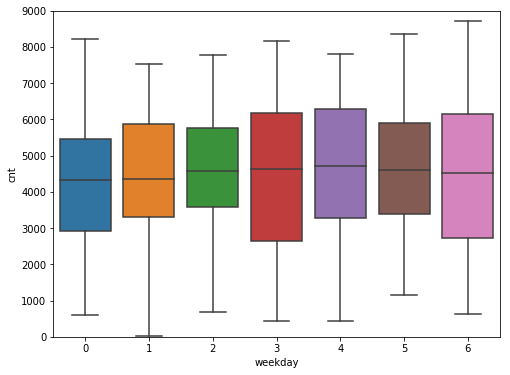

In [34]:
#box plot 'Weekdays' with 'CNT'
var_weekdays = 'weekday'
data = pd.concat([df_day['cnt'], df_day[var_weekdays]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var_weekdays, y="cnt", data=data)
fig.axis(ymin=0, ymax=9000);

It is showing that for all the weekdays median in between 4000- 5000  

#### Relation between Categorical Variable 'holiday' and target variable 'cnt'

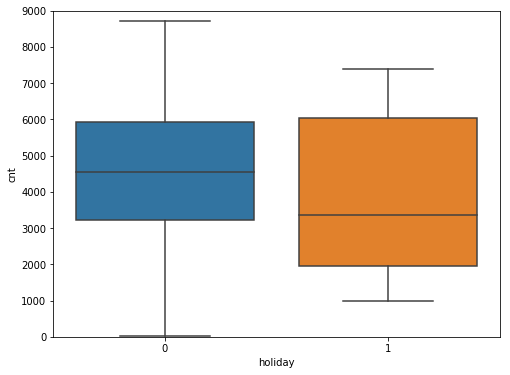

In [35]:
#box plot 'holiday' with 'CNT'
var_holiday = 'holiday'
data = pd.concat([df_day['cnt'], df_day[var_holiday]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var_holiday, y="cnt", data=data)
fig.axis(ymin=0, ymax=9000);

It is showing that median  high on  0 compared to 1

#### Relation between Categorical Variable 'yr' and target variable 'cnt'

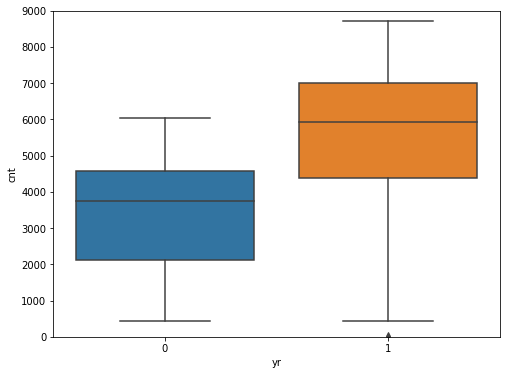

In [36]:
#box plot 'holiday' with 'CNT'
var_yr = 'yr'
data = pd.concat([df_day['cnt'], df_day[var_yr]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var_yr, y="cnt", data=data)
fig.axis(ymin=0, ymax=9000);

It's showing that median is higher on 2012 than 2011

#### Relation between Categorical Variable 'mnth' and target variable 'cnt'

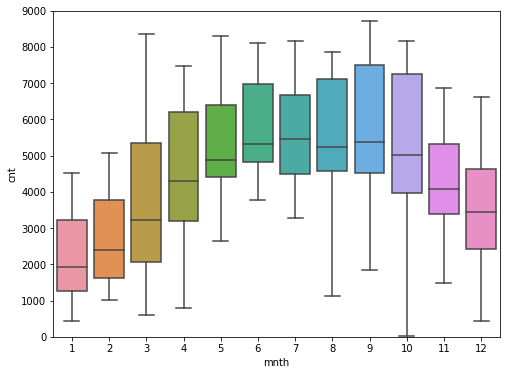

In [37]:
#box plot 'mnth' with 'CNT'
var_mnth = 'mnth'
data = pd.concat([df_day['cnt'], df_day[var_mnth]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var_mnth, y="cnt", data=data)
fig.axis(ymin=0, ymax=9000);

It's showing there's high variability in medians from different months

#### Relation between Categorical Variable 'season' and target variable 'cnt'

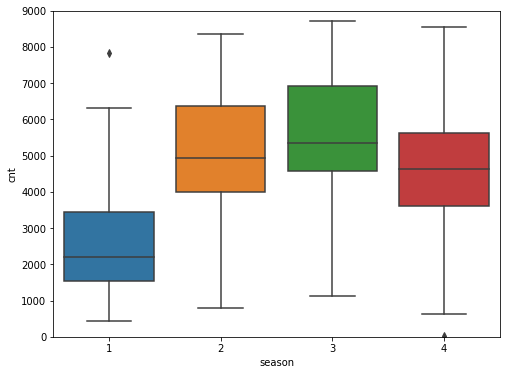

In [38]:
#box plot 'season' with 'CNT'
var_season = 'season'
data = pd.concat([df_day['cnt'], df_day[var_season]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var_season, y="cnt", data=data)
fig.axis(ymin=0, ymax=9000);

It's showing that median is higher for season 2 & season 3 compared to other seasons

#### Relation between Categorical Variable 'workingday' and target variable 'cnt'

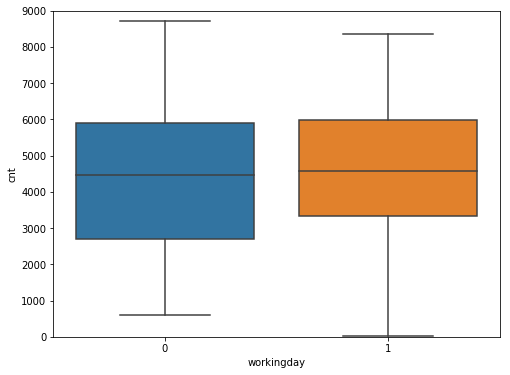

In [39]:
#box plot 'workingday' with 'CNT'
var_wd = 'workingday'
data = pd.concat([df_day['cnt'], df_day[var_wd]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var_wd, y="cnt", data=data)
fig.axis(ymin=0, ymax=9000);

It's showing the median is approximately same whether the day is working day or not

#### Relation between Categorical Variable 'weathersit' and target variable 'cnt'

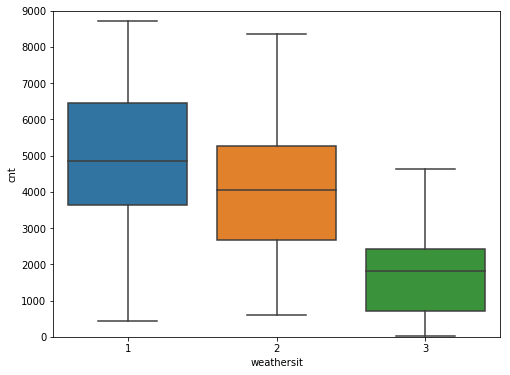

In [40]:
#box plot 'weathersit' with 'CNT'
var_ws = 'weathersit'
data = pd.concat([df_day['cnt'], df_day[var_ws]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var_ws, y="cnt", data=data)
fig.axis(ymin=0, ymax=9000);

It's showing that the median follows this pattern in the weathersit variable : 1>2>3

# Missing Value Analysis

In [41]:
#Calculate missing value
missing_val = pd.DataFrame(df_day.isnull().sum())

In [42]:
missing_val

,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0
atemp,0
hum,0


In [43]:
total = df_day.isnull().sum().sort_values(ascending=False)
percent = (df_day.isnull().sum()/df_day.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
cnt,0,0.0
registered,0,0.0
casual,0,0.0
windspeed,0,0.0
hum,0,0.0
atemp,0,0.0
temp,0,0.0
weathersit,0,0.0
workingday,0,0.0
weekday,0,0.0


So, I can see there are no missing values

# Outlier Analysis

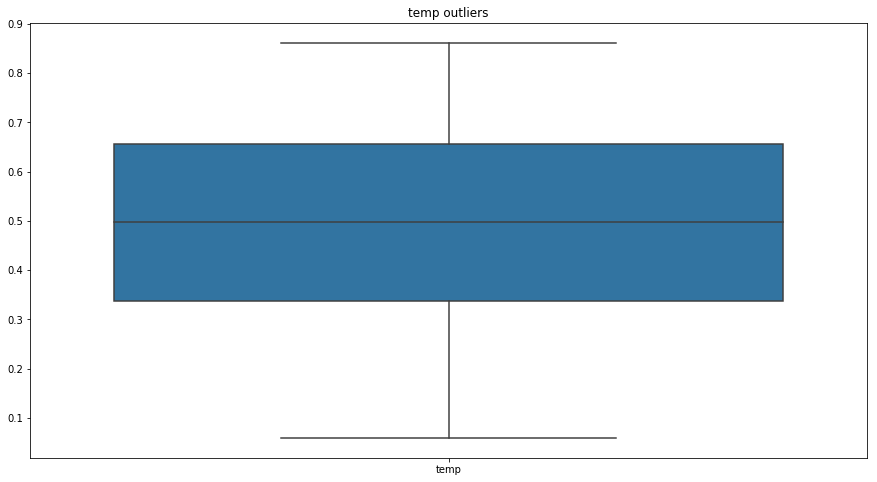

In [44]:
fig,ax=plt.subplots(figsize=(15,8))
#Boxplot for temp outliers
sns.boxplot(data=df_day[['temp']])
ax.set_title('temp outliers')
plt.show()

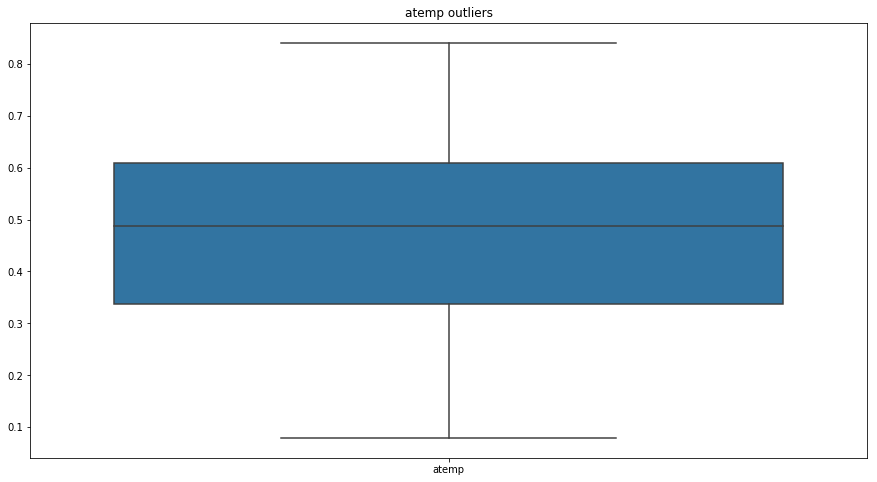

In [45]:
fig,ax=plt.subplots(figsize=(15,8))
#Boxplot for atemp outliers
sns.boxplot(data=df_day[['atemp']])
ax.set_title('atemp outliers')
plt.show()

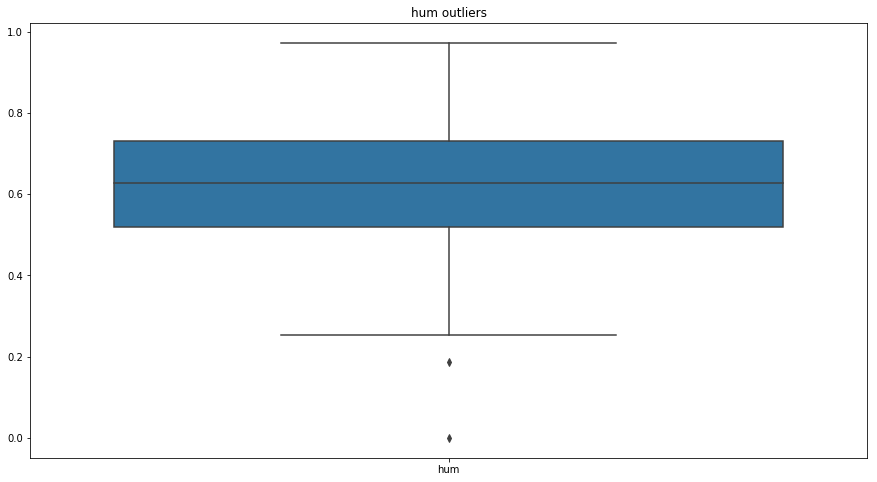

In [46]:
fig,ax=plt.subplots(figsize=(15,8))
#Boxplot for hum outliers
sns.boxplot(data=df_day[['hum']])
ax.set_title('hum outliers')
plt.show()

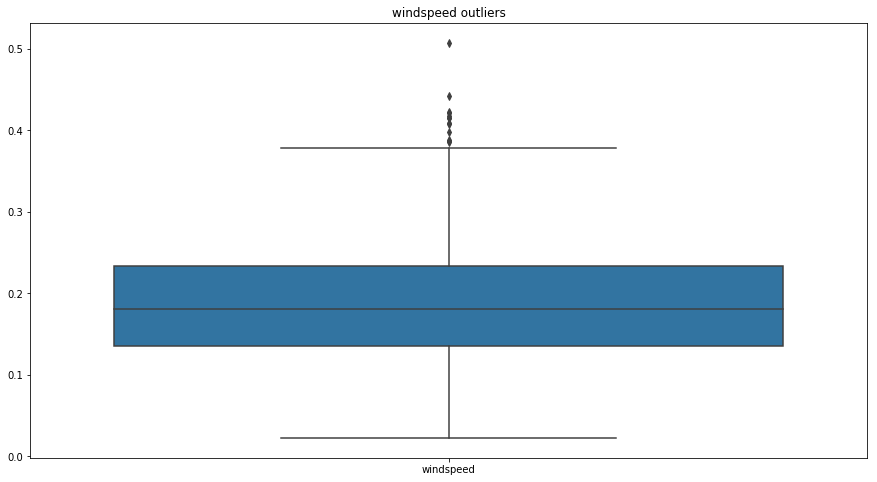

In [47]:
fig,ax=plt.subplots(figsize=(15,8))
#Boxplot for windspeed outliers
sns.boxplot(data=df_day[['windspeed']])
ax.set_title('windspeed outliers')
plt.show()

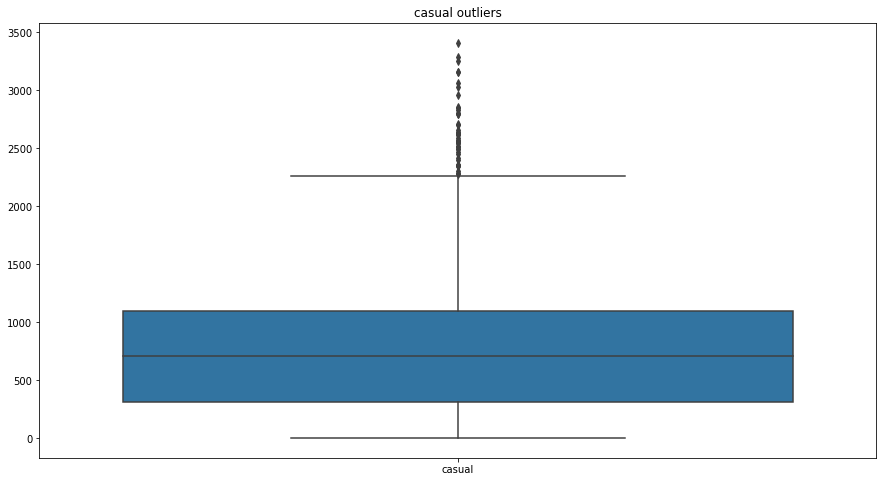

In [48]:
fig,ax=plt.subplots(figsize=(15,8))
#Boxplot for casual outliers
sns.boxplot(data=df_day[['casual']])
ax.set_title('casual outliers')
plt.show()

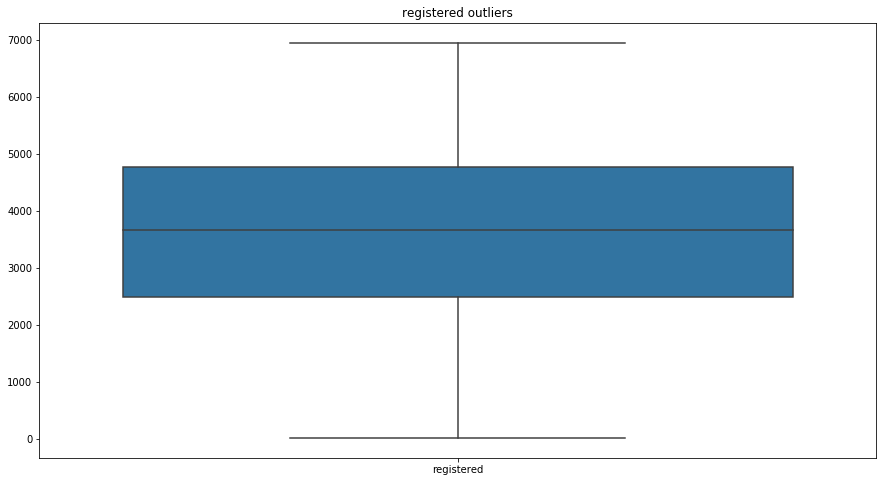

In [49]:
fig,ax=plt.subplots(figsize=(15,8))
#Boxplot for registered outliers
sns.boxplot(data=df_day[['registered']])
ax.set_title('registered outliers')
plt.show()

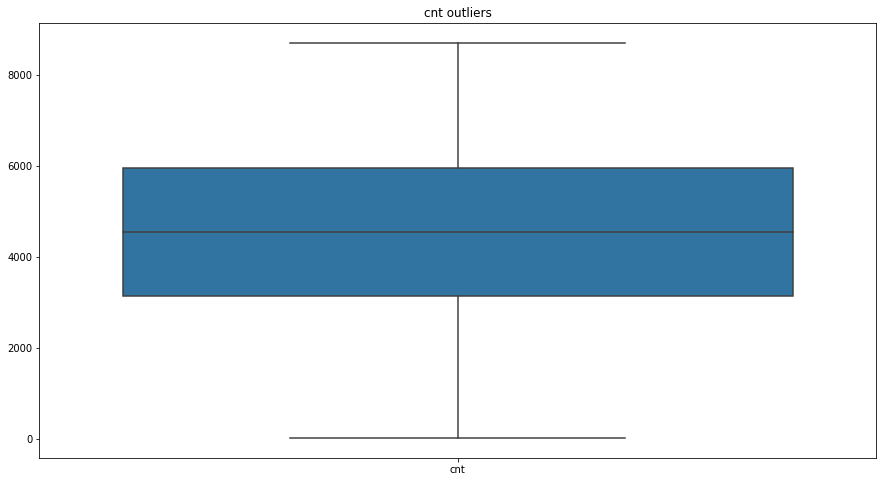

In [50]:
fig,ax=plt.subplots(figsize=(15,8))
#Boxplot for cnt outliers
sns.boxplot(data=df_day[['cnt']])
ax.set_title('cnt outliers')
plt.show()

#### I Can see 'hum', 'windspeed', 'casual' variables contain outliers

In [51]:
#create dataframe for hum
df_1=pd.DataFrame(df_day,columns=['hum'])
c1 = ['hum']

In [52]:
for i in c1:
    print(i)
    q75,q25=np.percentile(df_1.loc[:,i],[75,25]) # Divide data into 75%quantile and 25%quantile.
    iqr=q75-q25 #Inter quantile range
    LL1=q25-(iqr*1.5) #inner fence
    UL1=q75+(iqr*1.5) #outer fence
    
    print(LL1)
    print(UL1)

hum
0.20468725
1.0455212500000002


In [53]:
df_1.loc[df_1['hum']<LL1,:i]=np.nan  #Replace with NA
df_1.loc[df_1['hum']>UL1,:i]=np.nan  #Replace with NA

In [54]:
#Calculate missing value
missing_val_1 = pd.DataFrame(df_1.isnull().sum())

In [55]:
missing_val_1

,0
hum,2


In [56]:
#create dataframe for windspeed
df_2=pd.DataFrame(df_day,columns=['windspeed'])
c2 = ['windspeed']

In [57]:
for i in c2:
    print(i)
    q75,q25=np.percentile(df_2.loc[:,i],[75,25]) # Divide data into 75%quantile and 25%quantile.
    iqr=q75-q25 #Inter quantile range
    LL2=q25-(iqr*1.5) #inner fence
    UL2=q75+(iqr*1.5) #outer fence
    
    print(LL2)
    print(UL2)

windspeed
-0.012446750000000034
0.38061125


In [58]:
df_2.loc[df_2['windspeed']<LL2,:i]=np.nan  #Replace with NA
df_2.loc[df_2['windspeed']>UL2,:i]=np.nan  #Replace with NA

In [59]:
#Calculate missing value
missing_val_2 = pd.DataFrame(df_2.isnull().sum())

In [60]:
missing_val_2

,0
windspeed,13


In [61]:
#create dataframe for casual
df_3 = pd.DataFrame(df_day,columns=['casual'])
c3 = ['casual']

In [62]:
for i in c3:
    print(i)
    q75,q25=np.percentile(df_3.loc[:,i],[75,25]) # Divide data into 75%quantile and 25%quantile.
    iqr=q75-q25 #Inter quantile range
    LL3=q25-(iqr*1.5) #inner fence
    UL3=q75+(iqr*1.5) #outer fence
    
    print(LL3)
    print(UL3)

casual
-855.25
2266.75


In [63]:
df_3.loc[df_3['casual']<LL3,:i]=np.nan  #Replace with NA
df_3.loc[df_3['casual']>UL3,:i]=np.nan  #Replace with NA

In [64]:
#Calculate missing value
missing_val_3 = pd.DataFrame(df_3.isnull().sum())

In [65]:
missing_val_3

,0
casual,44


In [66]:
missing_val_ol = missing_val_1.append(missing_val_2).append(missing_val_3)

In [67]:
missing_val_ol

,0
hum,2
windspeed,13
casual,44


In [68]:
df_1['hum'].loc[4]

0.436957

In [70]:
#create missing value
#df_1['hum'].loc[4] = np.nan

#### actual value = 0.436957
#### mean = 0.6291968177842561
#### median = 0.6270834999999999
#### knn = 0.7075414618709852
#### So, median is giving the best result here

In [681]:
#mean method
#df_1['hum'] = df_1['hum'].fillna(df_1['hum'].mean())

In [741]:
#median method
#df_1['hum'] = df_1['hum'].fillna(df_1['hum'].median())

In [800]:
#KNN imputation
#Assigning levels to the categories
#lis = []
#for i in range(0, df_1.shape[1]):
 #   print(i)
  #  if(df_1.iloc[:,i].dtypes == 'object'):
   #     df_1.iloc[:,i] = pd.Categorical(df_1.iloc[:,i])
    #    print(df_1[[i]])
     #   df_1.iloc[:,i] = df_1.iloc[:,i].cat.codes 
      #  df_1.iloc[:,i] = df_1.iloc[:,i].astype('object')
        
       # lis.append(df_1.columns[i])

0
1
2


In [801]:
#Apply KNN imputation algorithm
#df_1 = pd.DataFrame(KNN(k = 3).fit_transform(df_1), columns = df_1.columns)

Imputing row 1/731 with 0 missing, elapsed time: 0.095
Imputing row 101/731 with 0 missing, elapsed time: 0.095
Imputing row 201/731 with 0 missing, elapsed time: 0.096
Imputing row 301/731 with 0 missing, elapsed time: 0.096
Imputing row 401/731 with 0 missing, elapsed time: 0.096
Imputing row 501/731 with 0 missing, elapsed time: 0.097
Imputing row 601/731 with 0 missing, elapsed time: 0.098
Imputing row 701/731 with 0 missing, elapsed time: 0.098
[KNN] Warning: 132/2193 still missing after imputation, replacing with 0


In [69]:
#Imputating the outliers by median Imputation
df_1['hum']=df_1['hum'].fillna(df_1['hum'].median())
df_2['windspeed']=df_2['windspeed'].fillna(df_2['windspeed'].median())
df_3['casual']=df_3['casual'].fillna(df_3['casual'].median())

Now again checking for nan

In [70]:
df_1.isnull().sum()

hum    0
dtype: int64

In [71]:
df_2.isnull().sum()

windspeed    0
dtype: int64

In [72]:
df_3.isnull().sum()

casual    0
dtype: int64

In [73]:
#Replacing with the imputated hum
df_day['hum']=df_day['hum'].replace(df_1['hum'])
#Replacing with the imputated windspeed
df_day['windspeed']=df_day['windspeed'].replace(df_2['windspeed'])
#Replacing with the imputated casual
df_day['casual']=df_day['casual'].replace(df_3['casual'])

# Feature Selection

In [74]:
df_day.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,253.0,654,985
1,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,695.0,670,801
2,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,1138.0,1229,1349
3,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,409.0,1454,1562
4,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,166.0,1518,1600


In [75]:
df_day.describe()

,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,0.495385,0.474354,0.628996,0.190486,1042.699042,3656.172367,4504.348837
std,0.183051,0.162961,0.140670,0.077498,639.699394,1560.256377,1937.211452
min,0.059130,0.079070,0.187917,0.022392,2.000000,20.000000,22.000000
25%,0.337083,0.337842,0.521041,0.134950,674.000000,2497.000000,3152.000000
50%,0.498333,0.486733,0.627500,0.180975,907.000000,3662.000000,4548.000000
75%,0.655417,0.608602,0.730833,0.233214,1325.000000,4776.500000,5956.000000
max,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [76]:
df_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 14 columns):
season        731 non-null category
yr            731 non-null category
mnth          731 non-null category
holiday       731 non-null category
weekday       731 non-null category
workingday    731 non-null category
weathersit    731 non-null category
temp          731 non-null float64
atemp         731 non-null float64
hum           731 non-null float64
windspeed     731 non-null float64
casual        731 non-null float64
registered    731 non-null int64
cnt           731 non-null int64
dtypes: category(7), float64(5), int64(2)
memory usage: 46.4 KB


## Correlation Analysis for numeric variables

In [77]:
day_numeric = df_day.loc[:,['temp','atemp','hum','windspeed','casual','registered','cnt']]

In [78]:
day_numeric.shape

(731, 7)

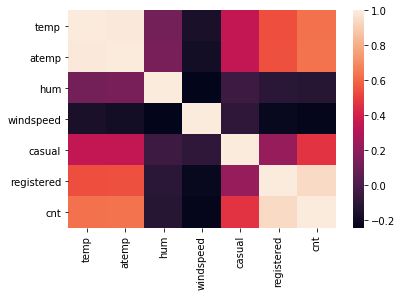

In [79]:
sns.heatmap(day_numeric.corr())

In [80]:
#draw  correlation matrix between all  numeric variables and analyse  what are the variables are important
#Selection of numerical feature  based  on pearson corelation 

day_numeric.corr(method='pearson').style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

,temp,atemp,hum,windspeed,casual,registered,cnt
temp,1.0,0.99,0.12,-0.16,0.35,0.54,0.63
atemp,0.99,1.0,0.14,-0.18,0.35,0.54,0.63
hum,0.12,0.14,1.0,-0.24,-0.05,-0.11,-0.12
windspeed,-0.16,-0.18,-0.24,1.0,-0.093,-0.22,-0.23
casual,0.35,0.35,-0.05,-0.093,1.0,0.22,0.47
registered,0.54,0.54,-0.11,-0.22,0.22,1.0,0.95
cnt,0.63,0.63,-0.12,-0.23,0.47,0.95,1.0


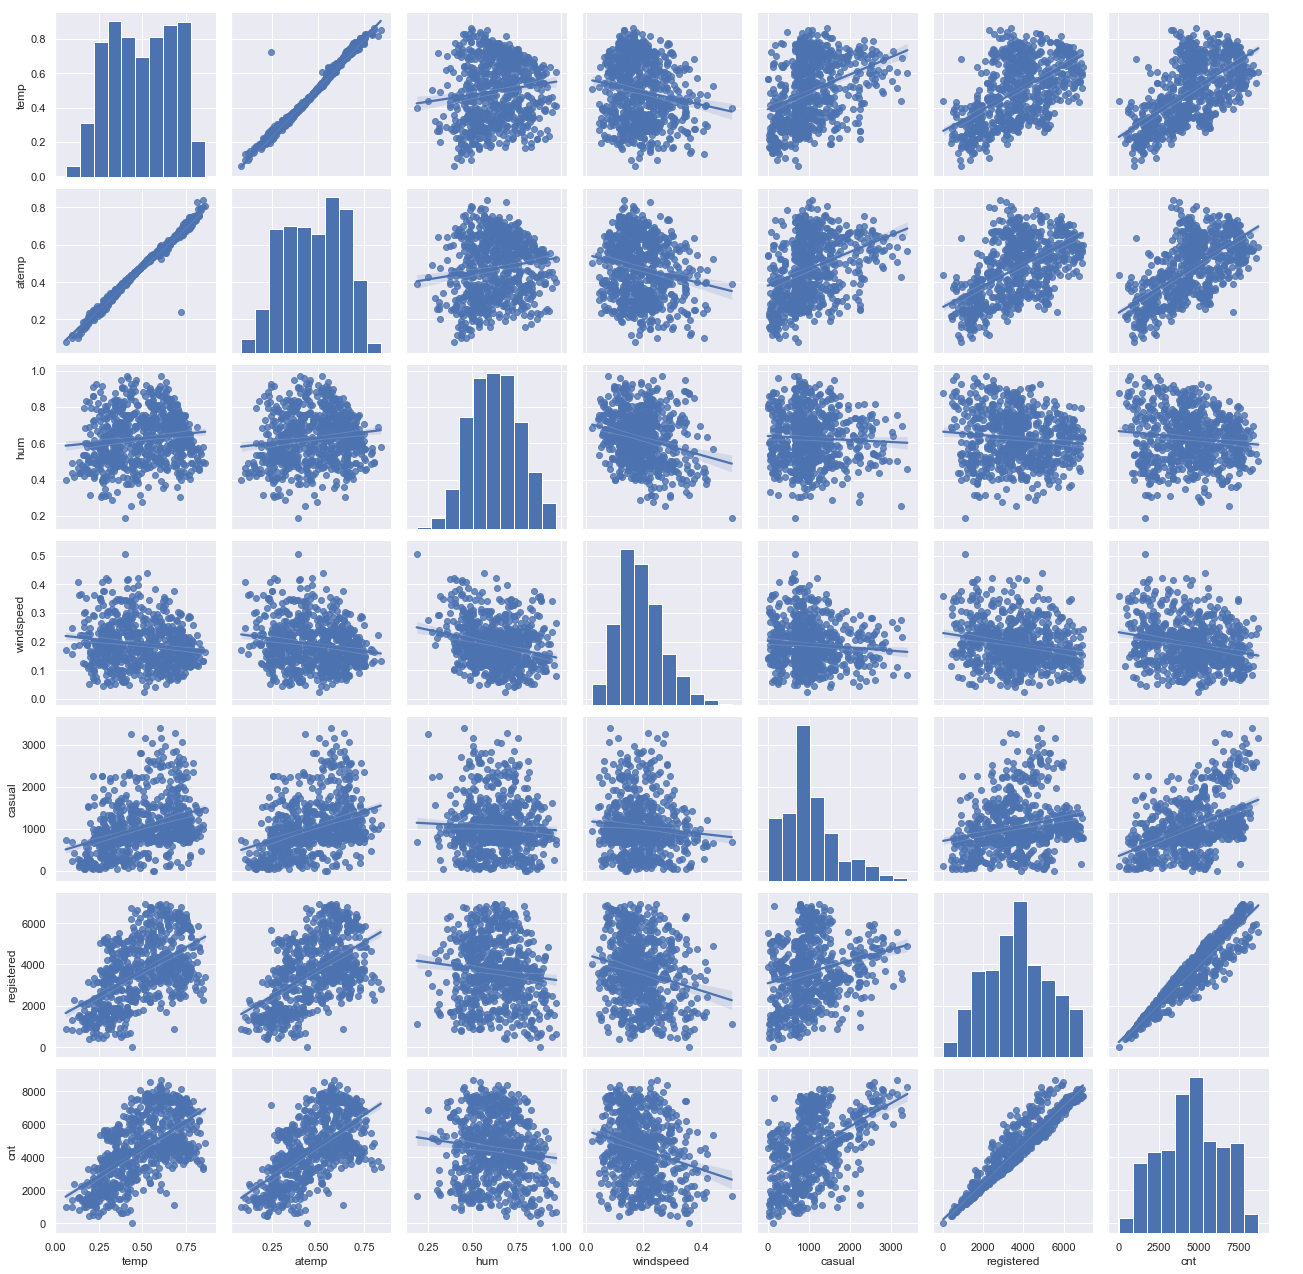

In [81]:
# check relationship with scatter plots

sns.set()
cols = ['temp', 'atemp', 'hum', 'windspeed', 'casual','registered','cnt']
sns.pairplot(day_numeric[cols], height = 2.5,kind="reg")
plt.show();

I can see high positive correlation between Independent variable 'temp' and 'atemp' so, I'll drop one of them

In [82]:
# so dropping one numeric variable for feature selection

numeric_features = day_numeric.loc[:,['temp', 'hum', 'windspeed', 'casual','registered','cnt']]

In [83]:
numeric_features.head()

,temp,hum,windspeed,casual,registered,cnt
0,0.344167,0.805833,0.160446,253.0,654,985
1,0.363478,0.696087,0.248539,695.0,670,801
2,0.196364,0.437273,0.248309,1138.0,1229,1349
3,0.200000,0.590435,0.160296,409.0,1454,1562
4,0.226957,0.436957,0.186900,166.0,1518,1600


In [84]:
numeric_features.shape

(731, 6)

## ANOVA Test for target variable with respect to categorical Variables 

-  It is carried out to compare between each groups in a categorical variable.
-  ANOVA only lets us know the means for different groups are same or not. It doesn’t help us identify which mean is different.
-  Hypothesis testing :
    -  Null Hypothesis: mean of all categories in a variable are same.
    -  Alternate Hypothesis: mean of at least one category in a variable is different.
-  If p-value is less than 0.05 then we reject the null hypothesis.
-  And if p-value is greater than 0.05 then we accept the null hypothesis.

In [85]:
cat_var

['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']

In [86]:
def anova_test(df_day,target):
    for i in cat_var:
        formula=('{} ~ {}').format(target, i)
        df_day.lm = ols(formula,data=df_day).fit()
        table = sm.stats.anova_lm(df_day.lm, typ=1)
        print('Anova table between',target,'and',i,'is\n',table)

In [87]:
from statsmodels.formula.api import ols

In [88]:
print('\n For target var = cnt--')
anova_test(df_day,'cnt')


 For target var = cnt--
Anova table between cnt and season is
              df        sum_sq       mean_sq           F        PR(>F)
season      3.0  9.505959e+08  3.168653e+08  128.769622  6.720391e-67
Residual  727.0  1.788940e+09  2.460715e+06         NaN           NaN
Anova table between cnt and yr is
              df        sum_sq       mean_sq           F        PR(>F)
yr          1.0  8.798289e+08  8.798289e+08  344.890586  2.483540e-63
Residual  729.0  1.859706e+09  2.551038e+06         NaN           NaN
Anova table between cnt and mnth is
              df        sum_sq       mean_sq          F        PR(>F)
mnth       11.0  1.070192e+09  9.729021e+07  41.903703  4.251077e-70
Residual  719.0  1.669343e+09  2.321757e+06        NaN           NaN
Anova table between cnt and holiday is
              df        sum_sq       mean_sq         F    PR(>F)
holiday     1.0  1.279749e+07  1.279749e+07  3.421441  0.064759
Residual  729.0  2.726738e+09  3.740381e+06       NaN       NaN
Anova

After looking at above table we see that p-value is 
-  less than 0.05 for season
-  less than 0.05 for weathersit
-  less than 0.05 for yr
-  less than 0.05 for mnth
-  greater than 0.05 for weekday 
-  greater than 0.05 for holiday
-  greater than 0.05 for workingday

so, I can accept the null hypothesis for weekday, holiday & workingday, saying that the means of all categories in these variable are same.
&, I can't accept the null hypothesis for season, weathersit, yr & mnth, saying that the means of all categories in these variable are not same.

However, as ANOVA doesn't specify which categories mean's are different, we can't conclude from the test results aboutwhich categorical variables I should remove.

## Chi squared Test of independence for categorical variables

In [89]:
for i in cat_var:
    for j in cat_var:
        if(i != j):
            chi2, p, dof, ex = chi2_contingency(pd.crosstab(df_day[i], df_day[j]))
            if(p < 0.05):
                print(i,"and",j,"are dependent on each other with",p,'----Remove')
            else:
                print(i,"and",j,"are independent on each other with",p,'----Keep')

season and yr are independent on each other with 0.9999288084245916 ----Keep
season and mnth are dependent on each other with 0.0 ----Remove
season and holiday are independent on each other with 0.6831687073042003 ----Keep
season and weekday are independent on each other with 0.9999999999988407 ----Keep
season and workingday are independent on each other with 0.8865568364019545 ----Keep
season and weathersit are dependent on each other with 0.021179301044733697 ----Remove
yr and season are independent on each other with 0.9999288084245916 ----Keep
yr and mnth are independent on each other with 0.9999999999999892 ----Keep
yr and holiday are independent on each other with 0.9949247279855291 ----Keep
yr and weekday are independent on each other with 0.9999995848511959 ----Keep
yr and workingday are independent on each other with 0.9799434134248637 ----Keep
yr and weathersit are independent on each other with 0.12737941480418666 ----Keep
mnth and season are dependent on each other with 0.0

-  variables which are highly dependent on each other based on p-values are:
    - season and month-0
    - season and weathersit-0.0211
    - mnth and weathersit-0.014
    - holiday and weekday-8.56e-11
    - hoilday and workingday-4.033e-11
    - weekday and workingday-6.77e-136
-  So I will remove season,holiday.

In [90]:
df_day = df_day.drop(['atemp','season','holiday'],axis = 1)

In [91]:
df_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 11 columns):
yr            731 non-null category
mnth          731 non-null category
weekday       731 non-null category
workingday    731 non-null category
weathersit    731 non-null category
temp          731 non-null float64
hum           731 non-null float64
windspeed     731 non-null float64
casual        731 non-null float64
registered    731 non-null int64
cnt           731 non-null int64
dtypes: category(5), float64(4), int64(2)
memory usage: 39.0 KB


In [92]:
df_day.shape

(731, 11)

I'll develop models based on decision tree, random forest & linear regression. As feature scaling does not have any impact on these algorithms, I'm choosing not to do feature scaling.

# Decision Tree Regressor

MAPE = 6.312463103557313%

In [93]:
#diividing  Test and train data  using skilearn   train_test_split 
train, test = train_test_split(df_day, test_size=0.2)

In [94]:
train.shape

(584, 11)

In [95]:
train.head()

,yr,mnth,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt
695,1,11,1,1,1,0.313333,0.535417,0.046650,634.0,4750,5087
387,1,1,1,1,2,0.218333,0.911250,0.110708,758.0,2287,2432
105,0,4,6,0,3,0.430833,0.888333,0.340808,847.0,674,795
643,1,10,5,1,1,0.615000,0.627500,0.106350,1516.0,6640,8156
22,0,1,0,0,1,0.096522,0.436522,0.246600,673.0,836,986


In [96]:
test.shape

(147, 11)

In [97]:
test.head()

,yr,mnth,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt
372,1,1,0,0,1,0.337500,0.465000,0.191542,1094.0,2826,3425
567,1,7,6,0,3,0.595833,0.865417,0.213300,1264.0,3195,4459
110,0,4,4,1,1,0.459167,0.407083,0.325258,745.0,3444,4189
147,0,5,6,0,1,0.655833,0.729583,0.230092,2001.0,2757,4758
284,0,10,3,1,3,0.543333,0.906250,0.248150,1521.0,2199,2416


In [98]:
train_features_one = train[['yr','mnth','weekday','workingday','weathersit','temp','hum','windspeed','casual','registered']].values
train_target_feature = train['cnt'].values
test_features_one = test[['yr','mnth','weekday','workingday','weathersit','temp','hum','windspeed','casual','registered']].values
test_target_feature= test['cnt'].values

In [99]:
train_features_one

array([[1, 11, 1, ..., 0.04665, 634.0, 4750],
       [1, 1, 1, ..., 0.11070799999999999, 758.0, 2287],
       [0, 4, 6, ..., 0.340808, 847.0, 674],
       ...,
       [0, 4, 2, ..., 0.274879, 428.0, 1777],
       [0, 7, 1, ..., 0.282337, 174.0, 3363],
       [1, 1, 4, ..., 0.129987, 2258.0, 3132]], dtype=object)

In [100]:
# Implement  decision tree algorithm
fit_dt = DecisionTreeRegressor(max_depth=2).fit(train_features_one, train_target_feature)
print(fit_dt)

DecisionTreeRegressor(max_depth=2)


In [101]:
#Apply model on test data
predictions_DT = fit_dt.predict(test_features_one)

print(predictions_DT)

[3484.40860215 4627.16022099 4627.16022099 3484.40860215 3484.40860215
 3484.40860215 6621.48186528 4627.16022099 1708.         6621.48186528
 4627.16022099 4627.16022099 6621.48186528 6621.48186528 1708.
 1708.         3484.40860215 1708.         4627.16022099 6621.48186528
 6621.48186528 3484.40860215 6621.48186528 6621.48186528 1708.
 4627.16022099 4627.16022099 6621.48186528 4627.16022099 6621.48186528
 1708.         6621.48186528 1708.         6621.48186528 6621.48186528
 1708.         4627.16022099 6621.48186528 6621.48186528 1708.
 6621.48186528 4627.16022099 4627.16022099 3484.40860215 4627.16022099
 1708.         6621.48186528 4627.16022099 4627.16022099 3484.40860215
 1708.         3484.40860215 6621.48186528 4627.16022099 6621.48186528
 6621.48186528 6621.48186528 4627.16022099 6621.48186528 4627.16022099
 1708.         1708.         4627.16022099 4627.16022099 3484.40860215
 4627.16022099 6621.48186528 6621.48186528 4627.16022099 4627.16022099
 3484.40860215 3484.40860215 6

In [102]:
#Calculate MAPE
def MAPE(y_true, y_pred): 
    mape = np.mean(np.abs((y_true - y_pred) / y_true))*100
    return mape

MAPE(test_target_feature, predictions_DT)

20.416119485672695

In [103]:
#Controlling the overfitting by setting "max_depth" to 14 and "min_samples_split" to 7 : fit_dt_2
max_depth = 14
min_samples_split =7
fit_dt_2 = DecisionTreeRegressor(max_depth =max_depth , min_samples_split =min_samples_split, random_state = 1)
fit_dt_2 = fit_dt_2.fit(train_features_one, train_target_feature)
print(fit_dt_2)

predictions_DT_two = fit_dt_2.predict(test_features_one)

print(predictions_DT_two)

MAPE(test_target_feature,predictions_DT_two)

DecisionTreeRegressor(max_depth=14, min_samples_split=7, random_state=1)
[3577.33333333 3904.5        4041.2        4691.8        2475.
 3344.         5329.16666667 4566.         2062.75       8164.5
 4206.5        3767.         7414.33333333 7494.8        2381.5
  226.5        3344.         1315.         4893.         7309.25
 7015.         3577.33333333 7635.         7494.8        1226.
 4574.         3855.         7249.         4574.         7783.5
 2485.25       6623.         2485.25       7361.         5090.2
 1906.6        4267.33333333 5233.4        5424.         1935.6
 5820.8        4267.33333333 4041.2        3344.         4041.2
 1935.6        5329.16666667 5101.66666667 4355.         3577.33333333
 1604.5        3253.66666667 7361.         3924.4        4612.
 5609.2        7361.         4784.33333333 5989.         4923.8
 1494.5        1604.5        4012.6        3747.         3253.66666667
 4629.8        5820.8        7309.25       6037.25       4267.33333333
 4497.25    

6.312463103557313

In [104]:
#setting "max_depth" to 16 and "min_samples_split" to 8 : fit_dt_3
max_depth = 16
min_samples_split =8
fit_dt_3 = DecisionTreeRegressor(max_depth =max_depth , min_samples_split =min_samples_split, random_state = 1)
fit_dt_3 = fit_dt_3.fit(train_features_one, train_target_feature)
print(fit_dt_3)

predictions_DT_three = fit_dt_3.predict(test_features_one)

print(predictions_DT_three)

MAPE(test_target_feature,predictions_DT_three)

DecisionTreeRegressor(max_depth=16, min_samples_split=8, random_state=1)
[3577.33333333 4382.71428571 4041.2        4691.8        2475.
 3344.         5329.16666667 4566.         2013.14285714 8164.5
 4206.5        3806.85714286 7414.33333333 7494.8        2381.5
  226.5        3344.         1315.         4846.42857143 7309.25
 7015.         3577.33333333 7635.         7494.8        1153.
 4574.         3855.         7135.57142857 4574.         7753.85714286
 2485.25       6623.         2485.25       7361.         5090.2
 1906.6        4267.33333333 5233.4        5424.         1935.6
 5820.8        4267.33333333 4041.2        3344.         4041.2
 1935.6        5329.16666667 5164.         4355.         3577.33333333
 1604.5        3003.14285714 7361.         3960.71428571 4612.
 5548.14285714 5698.         4846.42857143 5989.         4923.8
 1494.5        1604.5        3988.85714286 3747.         3003.14285714
 4629.8        5820.8        7309.25       6037.25       4267.33333333
 4497

6.466972813728315

As the error rate is increasing, I'll use max_depth = 14 & min_samples_split =7

# Random Forest

MAPE = 4.8215560270721385 %

In [105]:
RF_model_one = RandomForestRegressor(n_estimators= 500, random_state=100).fit(train_features_one,train_target_feature)

In [106]:
RF_predict_one= RF_model_one.predict(test_features_one)

In [107]:
#Evaluate Random forest using  MAPE 

MAPE(test_target_feature,RF_predict_one)

4.8215560270721385

In [108]:
mir_result = fs.mutual_info_regression(train_features_one, train_target_feature) # mutual information regression for feature ordering
mir_result

array([0.27706467, 0.38010512, 0.08052321, 0.02523791, 0.06000322,
       0.40444969, 0.04820394, 0.0251183 , 0.31830483, 1.67689485])

In [109]:
#tuning  Random FOrest Model

importances = list(RF_model_one.feature_importances_)

print(importances)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(train_features_one, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

[0.0011759795082633042, 0.0018040791395645208, 0.00144934102720957, 0.013511889307664506, 0.00035361392923180654, 0.011244871858088926, 0.0015839124729869734, 0.0012433763596200638, 0.05346881136700632, 0.914164125030364]


In [110]:
train_variables_one_1= train[['yr','mnth','weekday','workingday','weathersit','temp','hum','windspeed','casual','registered']]
train_variables_one_1
for name, importance in zip(train_variables_one_1, mir_result):
    print(name, "=", importance)

yr = 0.27706467431401305
mnth = 0.3801051158708031
weekday = 0.0805232101495541
workingday = 0.025237911320865836
weathersit = 0.060003221622345615
temp = 0.4044496896198808
hum = 0.04820394053561383
windspeed = 0.025118295631000542
casual = 0.3183048321850168
registered = 1.6768948531675667


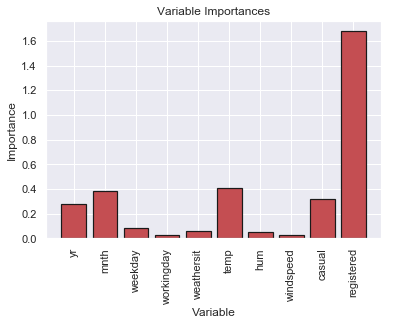

In [111]:
# list of x locations for plotting
x_values = list(range(len(mir_result)))

# Make a bar chart
plt.bar(x_values, mir_result, orientation = 'vertical', color = 'r', edgecolor = 'k', linewidth = 1.2)

# Tick labels for x axis
plt.xticks(x_values, train_variables_one_1, rotation='vertical')

# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

In [112]:
#the  above graph is stating  that  only  few features are important to decide the  accuracy of the model
# Now I wil check our model accuracy  by reducing features
train_feature_two = train[["yr" ,"mnth","weekday","weathersit","temp","hum","windspeed","casual","registered"]].values
test_feature_two= test[["yr" ,"mnth","weekday","weathersit","temp","hum","windspeed","casual","registered"]].values

# build random forest model
Rf_model_two = RandomForestRegressor(n_estimators= 500, random_state=100).fit(train_feature_two,train_target_feature)

# Predict the model using predict funtion
RF_predict_two= Rf_model_two.predict(test_feature_two)

print(RF_predict_two)


[3457.932 4114.584 4242.262 4575.52  3305.088 2969.91  5355.492 4660.408
 1990.626 7935.818 4542.994 3834.31  7524.972 7444.858 2213.106  497.942
 3085.568 1399.28  5024.898 7524.512 6944.8   3436.896 7483.374 7495.3
 1315.574 4693.756 4133.046 7340.75  4716.168 7751.988 2373.874 6591.53
 2292.502 7460.6   5083.732 1611.072 4426.392 5066.826 5784.238 2063.29
 5943.314 4134.504 4065.122 2892.602 4423.8   2008.046 5345.828 4991.25
 4370.452 3342.836 1840.832 2756.848 6528.498 3850.308 5108.826 5674.156
 7824.486 4760.586 6088.728 4630.644 1555.316 2015.298 3865.304 3493.084
 3450.494 4563.374 5703.802 7473.286 6113.064 4198.748 4518.066 4153.406
 6217.462 5756.18  1077.092 3984.856 7384.628  617.132 2097.378 3713.19
 3850.258  813.536 3646.59  3071.03  7585.896 4566.216 5217.702 4061.376
 4481.818 4812.43  1036.29  3665.468 6323.734 5183.476 7323.704 4326.762
 6210.42  4762.196 4666.326 6813.652 2015.42  2380.798 4472.824 2134.31
 7253.906 7486.648 2000.896 3409.7   3721.91  4537.982 573

In [113]:
#Evaluate Random forest using  MAPE 

MAPE(test_target_feature,RF_predict_two)

5.772481901668461

So, we can see the error rate has increased. So, I'm not reducing the no. of  (RF_model_one is the final Random forest model)

# Linear Regression

MAPE = 7.25457023326876%

As I have categorical variables in both the train & test dataset with more than 2 categories, I'll have to convert themm to numeric type

In [114]:
df_day.head()

,yr,mnth,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt
0,0,1,6,0,2,0.344167,0.805833,0.160446,253.0,654,985
1,0,1,0,0,2,0.363478,0.696087,0.248539,695.0,670,801
2,0,1,1,1,1,0.196364,0.437273,0.248309,1138.0,1229,1349
3,0,1,2,1,1,0.200000,0.590435,0.160296,409.0,1454,1562
4,0,1,3,1,1,0.226957,0.436957,0.186900,166.0,1518,1600


In [115]:
cat_var1 = ['yr','mnth','weekday','workingday','weathersit']

In [116]:
#Creating dummies for categorical variables
for i in cat_var1:
    ''' Creating dummies for each variable in cat_var and merging dummies dataframe to our original dataframe '''
    temp = pd.get_dummies(df_day[i], prefix = i)
    df_day = df_day.join(temp)

In [117]:
df_day.head()

,yr,mnth,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered,...,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,workingday_0,workingday_1,weathersit_1,weathersit_2,weathersit_3
0,0,1,6,0,2,0.344167,0.805833,0.160446,253.0,654,...,0,0,0,0,1,1,0,0,1,0
1,0,1,0,0,2,0.363478,0.696087,0.248539,695.0,670,...,0,0,0,0,0,1,0,0,1,0
2,0,1,1,1,1,0.196364,0.437273,0.248309,1138.0,1229,...,0,0,0,0,0,0,1,1,0,0
3,0,1,2,1,1,0.200000,0.590435,0.160296,409.0,1454,...,1,0,0,0,0,0,1,1,0,0
4,0,1,3,1,1,0.226957,0.436957,0.186900,166.0,1518,...,0,1,0,0,0,0,1,1,0,0


In [118]:
df_day.columns

Index(['yr', 'mnth', 'weekday', 'workingday', 'weathersit', 'temp', 'hum',
       'windspeed', 'casual', 'registered', 'cnt', 'yr_0', 'yr_1', 'mnth_1',
       'mnth_2', 'mnth_3', 'mnth_4', 'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8',
       'mnth_9', 'mnth_10', 'mnth_11', 'mnth_12', 'weekday_0', 'weekday_1',
       'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5', 'weekday_6',
       'workingday_0', 'workingday_1', 'weathersit_1', 'weathersit_2',
       'weathersit_3'],
      dtype='object')

In [119]:
df_day = df_day.drop(['yr','mnth','weekday','workingday','weathersit'],axis = 1)

In [120]:
df_day.shape

(731, 32)

In [121]:
train_lr, test_lr = train_test_split(df_day, test_size=0.2)

In [122]:
train_lr.shape

(584, 32)

In [123]:
train_lr.head()

,temp,hum,windspeed,casual,registered,cnt,yr_0,yr_1,mnth_1,mnth_2,...,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,workingday_0,workingday_1,weathersit_1,weathersit_2,weathersit_3
162,0.692500,0.747917,0.163567,1467.0,2993,4460,1,0,0,0,...,0,0,0,0,0,1,0,1,0,0
554,0.822500,0.573750,0.125629,1203.0,3469,4672,0,1,0,0,...,0,0,0,0,0,1,0,1,0,0
710,0.353333,0.596667,0.296037,1514.0,5219,5501,0,1,0,0,...,1,0,0,0,0,0,1,0,1,0
360,0.325000,0.762500,0.188450,529.0,1059,1162,1,0,0,0,...,1,0,0,0,0,0,1,0,1,0
572,0.776667,0.596667,0.284813,1036.0,5825,6861,0,1,0,0,...,0,0,1,0,0,0,1,1,0,0


In [124]:
test_lr.shape

(147, 32)

In [125]:
test_lr.head()

,temp,hum,windspeed,casual,registered,cnt,yr_0,yr_1,mnth_1,mnth_2,...,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,workingday_0,workingday_1,weathersit_1,weathersit_2,weathersit_3
470,0.606667,0.507917,0.225129,2846.0,4286,7132,0,1,0,0,...,0,0,0,0,0,1,0,1,0,0
431,0.404167,0.513333,0.345779,486.0,4484,4916,0,1,0,0,...,0,1,0,0,0,0,1,1,0,0
439,0.557500,0.579583,0.149883,1005.0,5187,6192,0,1,0,0,...,0,0,1,0,0,0,1,1,0,0
629,0.599167,0.668750,0.154229,1250.0,6917,8167,0,1,0,0,...,0,0,0,1,0,0,1,1,0,0
116,0.620000,0.835417,0.312200,1421.0,3325,3872,1,0,0,0,...,0,1,0,0,0,0,1,0,1,0


In [126]:
train_features_lr = train_lr[['temp', 'hum', 'windspeed', 'casual', 'registered', 
       'weathersit_1', 'weathersit_2', 'weathersit_3', 'yr_0', 'yr_1',
       'mnth_1', 'mnth_2', 'mnth_3', 'mnth_4', 'mnth_5', 'mnth_6', 'mnth_7',
       'mnth_8', 'mnth_9', 'mnth_10', 'mnth_11', 'mnth_12', 'weekday_0',
       'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5',
       'weekday_6', 'workingday_0', 'workingday_1']].values
train_target_feature_lr = train_lr['cnt'].values
test_features_lr = test_lr[['temp', 'hum', 'windspeed', 'casual', 'registered', 
       'weathersit_1', 'weathersit_2', 'weathersit_3', 'yr_0', 'yr_1',
       'mnth_1', 'mnth_2', 'mnth_3', 'mnth_4', 'mnth_5', 'mnth_6', 'mnth_7',
       'mnth_8', 'mnth_9', 'mnth_10', 'mnth_11', 'mnth_12', 'weekday_0',
       'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5',
       'weekday_6', 'workingday_0', 'workingday_1']].values
test_target_feature_lr= test_lr['cnt'].values

In [127]:
train_features_lr

array([[0.6925   , 0.747917 , 0.163567 , ..., 0.       , 1.       ,
        0.       ],
       [0.8225   , 0.57375  , 0.125629 , ..., 0.       , 1.       ,
        0.       ],
       [0.353333 , 0.596667 , 0.296037 , ..., 0.       , 0.       ,
        1.       ],
       ...,
       [0.1775   , 0.457083 , 0.353242 , ..., 0.       , 0.       ,
        1.       ],
       [0.435833 , 0.842083 , 0.113192 , ..., 0.       , 0.       ,
        1.       ],
       [0.4225   , 0.629167 , 0.0926667, ..., 1.       , 1.       ,
        0.       ]])

In [128]:
#develop Linear Regression model using sm.ols

linear_regression_model = sm.OLS(train_target_feature_lr, train_features_lr).fit()

In [129]:
#Summary of model
linear_regression_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.984
Model:                            OLS   Adj. R-squared:                  0.984
Method:                 Least Squares   F-statistic:                     1341.
Date:                Sat, 01 Aug 2020   Prob (F-statistic):               0.00
Time:                        18:15:08   Log-Likelihood:                -4039.5
No. Observations:                 584   AIC:                             8133.
Df Residuals:                     557   BIC:                             8251.
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1           648.3131    159.211      4.072      0.000     335.587     961.040
x2          -234.9046    113.075     -2.077      0.038    -457.011     -12.798
x3          -690.4054    154.100     -4.480      0.000    -993.094    -387.717
x4             0.4858      0.022     22.422      0.000       0.443       0.528
x5             1.0802      0.017     64.968      0.000       1.048       1.113
x6            97.5028     33.713      2.892      0.004      31.282     163.723
x7            29.1557     33.905      0.860      0.390     -37.441      95.752
x8          -121.0429     61.368     -1.972      0.049    -241.584      -0.502
x9           -22.8244     37.217     -0.613      0.540     -95.927      50.278
x10           28.4400     47.149      0.603      0.547     -64.171     121.051
x11         -157.3556     50.701     -3.104      0.002    -256.944     -57.768
x12         -208.6390     44.270     -4.713      0.000    -295.595    -121.683
x13           42.4207     38.822      1.093      0.275     -33.834     118.675
x14          142.7603     37.229      3.835      0.000      69.633     215.888
x15          152.9916     40.372      3.790      0.000      73.691     232.292
x16           85.2116     47.246      1.804      0.072      -7.590     178.014
x17           17.4718     55.618      0.314      0.754     -91.774     126.718
x18           54.4093     49.261      1.105      0.270     -42.351     151.169
x19           70.4264     43.139      1.633      0.103     -14.310     155.162
x20           93.9928     39.424      2.384      0.017      16.555     171.430
x21          -98.6763     39.550     -2.495      0.013    -176.362     -20.990
x22         -189.3980     40.900     -4.631      0.000    -269.734    -109.062
x23           85.3930     49.319      1.731      0.084     -11.482     182.267
x24          -34.6408     29.403     -1.178      0.239     -92.395      23.113
x25          -70.0650     34.705     -2.019      0.044    -138.234      -1.896
x26          -58.6742     35.299     -1.662      0.097    -128.009      10.661
x27          -85.4782     35.677     -2.396      0.017    -155.556     -15.401
x28           16.3429     33.114      0.494      0.622     -48.700      81.386
x29          152.7379     49.770      3.069      0.002      54.978     250.498
x30          198.9538     52.016      3.825      0.000      96.782     301.125
x31         -193.3381     49.731     -3.888      0.000    -291.020     -95.656
==============================================================================
Omnibus:                       32.147   Durbin-Watson:                   2.153
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               67.409
Skew:                          -0.318   Prob(JB):                     2.30e-15
Kurtosis:                       4.538   Cond. No.                     1.06e+16
==

In [130]:
#predict the  model

predict_LR = linear_regression_model.predict(test_features_lr)

print(predict_LR)

[6684.17863862 4898.98209614 6102.82174046 8223.56106212 4169.40113768
 4051.23484114 6015.45056022 5579.87701697 4026.25783159 1072.23485284
 4940.80110647 3882.11761644 2590.68971498 6712.47623707 1161.30427612
 1628.5370397  7427.98864557 7633.06655564 4576.22158994 5871.76215185
 5682.31622785 5381.51770268 3023.26701114 6066.71232524 4109.1624394
 4428.15253512 7007.51651214 2499.60653143 1965.72966286 6702.19926295
 5568.71828349 3918.09084358 4785.59948476 5466.82446211 7297.75841863
 5410.34138859 6601.77715281 5271.24839383 2793.54267425 4320.72406468
 3351.71113949 3405.91697466 2923.47956065 4942.9989309  6625.89244852
 1466.53611024 6116.45013654 7389.2074851  4774.30698236 5152.67651657
 5334.56201389 5367.49755232 7593.68713484 4042.36530249 2409.23020438
 6987.75720011 5046.74227514 4434.04193164 1917.55683286 2228.40581811
 3463.7022985  5047.33642722 4502.53418944 2240.2374704  2780.54089531
 2311.73770711 4295.55393484 4404.68265504 4692.36902948 4404.95819516
 6937.5

In [131]:
#evaluate model using MAPE

MAPE(test_target_feature_lr,predict_LR)

7.25457023326876

Conclusion  Random Forest is the  best model for the dataset

# Output with New Input

I've selected a few observations from the given dataset & slightly altered them to create a new dataset in order to get features with realistic values; I shall use this dataset as a new sample input & predict the output & at last I'll see how well the model is performing (by checking the error rate)

#### Instructions for using this model on a dataset
1. Drop 'instant','dteday','season','holiday' & 'atemp' variables as these are statistically insignificant
2. Convert 'yr','mnth','weekday','workingday' & 'weathersit' variables to category type
3. Convert 'cnt', 'casual' & 'registered' variables to float
4. Apply the model on the indepenent variables

In [132]:
df_eval = pd.read_csv('day_new.csv')

In [133]:
df_eval.shape

(4, 16)

In [134]:
df_eval

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2011,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,326,660,986
1,84,25-03-2011,2,0,3,0,5,1,1,0.264167,0.256312,0.495000,0.230725,292,1928,2220
2,249,06-09-2011,3,0,9,0,2,1,3,0.540000,0.515200,0.886957,0.343943,211,2499,2710
3,268,25-09-2011,4,0,9,0,0,0,2,0.634167,0.572637,0.845000,0.050379,1522,3458,5010


In [135]:
df_eval.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 16 columns):
instant       4 non-null int64
dteday        4 non-null object
season        4 non-null int64
yr            4 non-null int64
mnth          4 non-null int64
holiday       4 non-null int64
weekday       4 non-null int64
workingday    4 non-null int64
weathersit    4 non-null int64
temp          4 non-null float64
atemp         4 non-null float64
hum           4 non-null float64
windspeed     4 non-null float64
casual        4 non-null int64
registered    4 non-null int64
cnt           4 non-null int64
dtypes: float64(4), int64(11), object(1)
memory usage: 592.0+ bytes


In [136]:
#dropping statistically insignificant variables
df_eval=df_eval.drop(['instant','dteday','season','holiday','atemp'],axis=1)

In [137]:
df_eval

,yr,mnth,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt
0,0,1,6,0,2,0.344167,0.805833,0.160446,326,660,986
1,0,3,5,1,1,0.264167,0.495000,0.230725,292,1928,2220
2,0,9,2,1,3,0.540000,0.886957,0.343943,211,2499,2710
3,0,9,0,0,2,0.634167,0.845000,0.050379,1522,3458,5010


In [138]:
cat_var_new=['yr','mnth','weekday','workingday','weathersit']

In [139]:
# assigning appropriate data types to features
df_eval[cat_var_new]=df_eval[cat_var_new].apply(lambda x: x.astype('category') )
df_eval['cnt'] = df_eval['cnt'].astype('float64')
df_eval['casual'] = df_eval['casual'].astype('float64')
df_eval['registered'] = df_eval['registered'].astype('float64')

In [140]:
df_eval.columns

Index(['yr', 'mnth', 'weekday', 'workingday', 'weathersit', 'temp', 'hum',
       'windspeed', 'casual', 'registered', 'cnt'],
      dtype='object')

In [141]:
eval_features = df_eval[['yr', 'mnth', 'weekday', 'workingday',
       'weathersit', 'temp', 'hum', 'windspeed', 'casual',
       'registered']].values

eval_target_feature = df_eval['cnt'].values

In [142]:
RF_predict_two= RF_model_one.predict(eval_features)

In [143]:
MAPE(eval_target_feature,RF_predict_two)

3.816723785353745

#### From here, we can see the generated model is performing well with a new dataset